In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, excel file I/O (e.g. pd.read_excel)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
df = pd.read_excel('informatika2018-2019.xlsx', header=None)

In [3]:
# Menghapus Index ke-0
df = df.drop([0])

# Menghapus Index
df = df.reset_index(drop=True)
df.columns = ['Nim','Nama','Prodi','Lama Penulisan','SKS','IPK','TOEFL','Kelas']

In [4]:
df.head()

,Nim,Nama,Prodi,Lama Penulisan,SKS,IPK,TOEFL,Kelas
0,1700018006,Utari Nur Azizah Rais,Informatika,16.233333,144,3.58,520,Tidak Tepat Waktu
1,1700018009,Binta Wahyu Wicaksono,Informatika,19.3,145,3,464,Tidak Tepat Waktu
2,1700018032,Himawan Imtikhan Azmi,Informatika,10.466667,144,3.59,496,Tidak Tepat Waktu
3,1700018044,Rahul Malfiqri,Informatika,9.966667,147,3.03,502,Tidak Tepat Waktu
4,1700018048,Trisna Irawan,Informatika,13.5,144,3.38,507,Tidak Tepat Waktu


In [5]:
df.shape

(134, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Nim             134 non-null    object
 1   Nama            134 non-null    object
 2   Prodi           134 non-null    object
 3   Lama Penulisan  134 non-null    object
 4   SKS             134 non-null    object
 5   IPK             134 non-null    object
 6   TOEFL           134 non-null    object
 7   Kelas           134 non-null    object
dtypes: object(8)
memory usage: 8.5+ KB


In [7]:
df.isnull().values.any()

False

In [8]:
ket = {"Tepat Waktu" : 0, "Tidak Tepat Waktu" : 1}
df["Kelas"] = df["Kelas"].map(ket)

In [9]:
df['Kelas'].value_counts()

Kelas
0    71
1    63
Name: count, dtype: int64

In [10]:
print('Tepat Waktu', round(df['Kelas'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Tidak Tepat Waktu', round(df['Kelas'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Tepat Waktu 52.99 % of the dataset
Tidak Tepat Waktu 47.01 % of the dataset


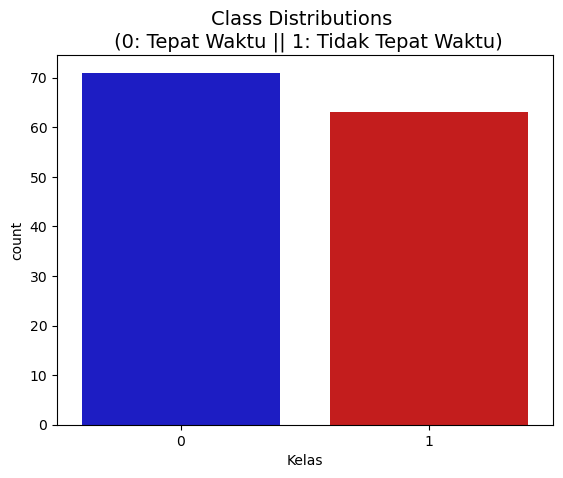

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = ["#0101DF", "#DF0101"]
sns.countplot(x='Kelas', data=df, palette=colors)
plt.title('Class Distributions \n (0: Tepat Waktu || 1: Tidak Tepat Waktu)', fontsize=14)
plt.show()

In [12]:
# Class count
count_class_0, count_class_1 = df.Kelas.value_counts()

# Divide by class
df_class_0 = df[df['Kelas'] == 0]
df_class_1 = df[df['Kelas'] == 1]

Random over-sampling:
Kelas
0    71
1    71
Name: count, dtype: int64


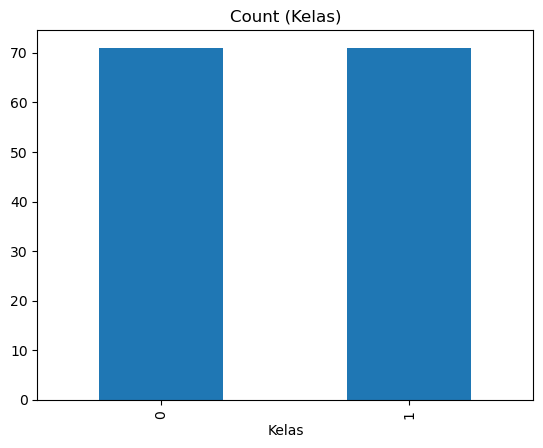

In [13]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Kelas.value_counts())

df_test_over.Kelas.value_counts().plot(kind='bar', title='Count (Kelas)');

In [14]:
x = df[['Lama Penulisan', 'SKS', 'IPK', 'TOEFL']]
y = df['Kelas']

In [15]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

validation_size = 0.30
num_trees = 5

# Pisahkan data menjadi data latih dan data uji
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=validation_size, shuffle=False, random_state=None)

In [16]:
# Inisialisasi model Random Forest dengan parameter yang disetel secara manual
model = RandomForestClassifier(
    n_estimators=num_trees,
    max_depth=5,
    min_samples_split=3,
    min_samples_leaf=2
)

In [17]:
model = RandomForestClassifier(n_estimators=num_trees, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=42)

In [18]:
# Prediksi pada data latih
y_train_pred = model.predict(x_train)

# Prediksi pada data uji
y_test_pred = model.predict(x_test)

In [19]:
# Hitung confusion matrix pada data latih
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

In [20]:
# Hitung akurasi pada data latih
accuracy_train = accuracy_score(y_train, y_train_pred)

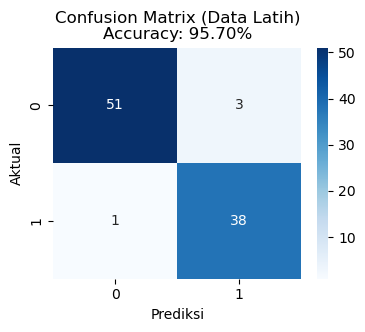

In [21]:
# Visualisasi confusion matrix pada data latih
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title(f'Confusion Matrix (Data Latih)\nAccuracy: {accuracy_train:.2%}')
plt.show()

In [22]:
# Hitung confusion matrix pada data uji
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

In [23]:
# Hitung akurasi pada data uji
accuracy_test = accuracy_score(y_test, y_test_pred)

In [24]:
# Ekstraksi nilai dari confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
tn, fp, fn, tp = conf_matrix_test.ravel()

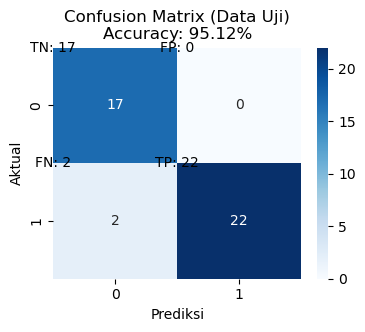

In [38]:
# Visualisasi confusion matrix pada data uji dengan penekanan pada True Positive dan False Negative
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])

# Menambahkan label untuk True Positive dan False Negative
plt.text(0, 0, f'TN: {tn}', horizontalalignment='center', verticalalignment='center')
plt.text(0, 1, f'FN: {fn}', horizontalalignment='center', verticalalignment='center')
plt.text(1, 0, f'FP: {fp}', horizontalalignment='center', verticalalignment='center')
plt.text(1, 1, f'TP: {tp}', horizontalalignment='center', verticalalignment='center')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title(f'Confusion Matrix (Data Uji)\nAccuracy: {accuracy_test:.2%}')
plt.show()

In [27]:
df_new = pd.read_excel('informatika20.xlsx')

In [28]:
# Menghapus Index
df_new = df_new.reset_index(drop=True)
df_new.columns = ['nim','nama','prodi','Lama Penulisan','SKS','IPK','TOEFL','Kelas']
def_status = 0
df_new.fillna(def_status, inplace = True)
df_new

,nim,nama,prodi,Lama Penulisan,SKS,IPK,TOEFL,Kelas
0,2000018020,Aulia Ahmad Husaini,Informatika,8,126,2.84,455,0.0
1,2000018021,Muhamad Fadhlurrohman Hakim,Informatika,8,126,3.21,442,0.0
2,2000018024,Maulana Farid Ma'ruf,Informatika,6,130,3.46,464,0.0
3,2000018026,Alfi Maulana Akbar,Informatika,8,127,2.63,457,0.0
4,2000018027,Arya Prio Winoto,Informatika,7,125,3.58,510,0.0
...,...,...,...,...,...,...,...,...
114,2000018204,Muhammad Asyam Dirhamsyah,Informatika,7,131,3.88,457,0.0
115,2000018205,Muhammad Ferry Munandar,Informatika,7,130,3.54,510,0.0
116,2000018206,Duwi Oktoviyanti,Informatika,7,128,3.79,448,0.0
117,2000018209,Vintya Dewi Anjani,Informatika,7,131,3.84,498,0.0


In [29]:
# Mapping kelas menjadi 0 (Tepat Waktu) dan 1 (Tidak Tepat Waktu)
ket = {"Tepat Waktu": 0, "Tidak Tepat Waktu": 1}
df_new["Kelas"] = df_new["Kelas"].map(ket)

In [30]:
# Membuat data training
data2 = df_new.loc[:, ['Lama Penulisan', 'SKS', 'IPK', 'TOEFL']]
X_new = data2

In [31]:
# Prediksi menggunakan model Random Forest yang telah dilatih
predictions_new = model.predict(X_new)

In [32]:
# Mapping hasil prediksi menjadi label yang sesuai
hasil_prediksi = pd.Series(predictions_new).map({0: "Tepat Waktu", 1: "Tidak Tepat Waktu"})

In [33]:
# Menambahkan kolom Hasil ke dataset_new
df_new['Hasil'] = hasil_prediksi

In [34]:
# Menampilkan hasil prediksi
print("Prediksi untuk dataset baru:")
print(df_new[['nim','nama','prodi','Lama Penulisan', 'SKS', 'IPK', 'TOEFL', 'Hasil']])

Prediksi untuk dataset baru:
            nim                         nama        prodi  Lama Penulisan  \
0    2000018020          Aulia Ahmad Husaini  Informatika               8   
1    2000018021  Muhamad Fadhlurrohman Hakim  Informatika               8   
2    2000018024         Maulana Farid Ma'ruf  Informatika               6   
3    2000018026           Alfi Maulana Akbar  Informatika               8   
4    2000018027             Arya Prio Winoto  Informatika               7   
..          ...                          ...          ...             ...   
114  2000018204    Muhammad Asyam Dirhamsyah  Informatika               7   
115  2000018205      Muhammad Ferry Munandar  Informatika               7   
116  2000018206             Duwi Oktoviyanti  Informatika               7   
117  2000018209           Vintya Dewi Anjani  Informatika               7   
118  2000018210         Rafif Nugie Indrasta  Informatika               7   

     SKS   IPK  TOEFL        Hasil  
0    126 

In [35]:
# Hitung nilai kelas
class_counts = df_new.Hasil.value_counts()

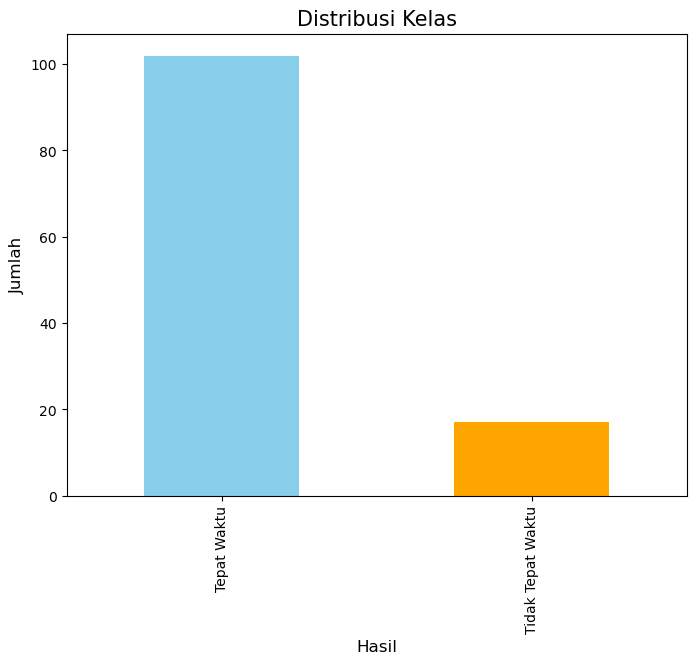

In [36]:
# Buat plot bar
plt.figure(figsize=(8,6))
class_counts.plot(kind='bar', color=['skyblue', 'orange'])
# Beri judul dan label sumbu
plt.title('Distribusi Kelas', fontsize=15)
plt.xlabel('Hasil', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)

# Tampilkan plot
plt.show()

In [37]:
# Simpan model ke dalam file menggunakan pickle
import pickle
with open('informatika.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)